In [6]:
import mplfinance as mpf
import numpy as np
import pandas_datareader.data as web

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-04,2995.250000,2973.080078,2991.969971,2989.239990,621200.0,2989.239990
2022-01-05,2986.199951,2936.729980,2984.050049,2953.969971,786900.0,2953.969971
2022-01-06,2952.540039,2915.379883,2925.399902,2920.530029,785500.0,2920.530029
2022-01-07,2959.030029,2933.100098,2933.780029,2954.889893,545800.0,2954.889893
2022-01-10,2951.120117,2910.899902,2947.370117,2926.719971,477000.0,2926.719971


,High,Low,Open,Close,Volume,Adj Close,MA3,MA5,MA10,MA20
Date,,,,,,,,,,
2022-01-04,2995.250000,2973.080078,2991.969971,2989.239990,621200.0,2989.239990,NaN,NaN,NaN,NaN
2022-01-05,2986.199951,2936.729980,2984.050049,2953.969971,786900.0,2953.969971,NaN,NaN,NaN,NaN
2022-01-06,2952.540039,2915.379883,2925.399902,2920.530029,785500.0,2920.530029,2954.579997,NaN,NaN,NaN
2022-01-07,2959.030029,2933.100098,2933.780029,2954.889893,545800.0,2954.889893,2943.129964,NaN,NaN,NaN
2022-01-10,2951.120117,2910.899902,2947.370117,2926.719971,477000.0,2926.719971,2934.046631,2949.069971,NaN,NaN


InvalidIndexError: (slice(None, None, None), None)

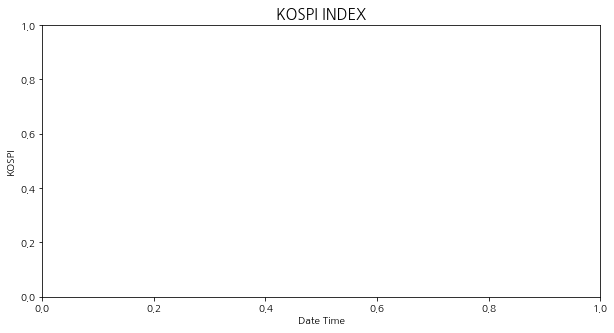

In [35]:
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data  
from datetime import datetime
from IPython.display import display

# 데이터를 가져올 날짜 설정
start_date = datetime(2022,1,1)
end_date = datetime(2022,9,27)

# 야후에서 코스피 데이터 가져오기
kospi_df = data.get_data_yahoo("^KS11", start_date, end_date) 
display(kospi_df.head(5))

# 지수 이동평균선 데이터 구하기
kospi_df['MA3'] = kospi_df['Close'].rolling(3).mean()
kospi_df['MA5'] = kospi_df['Close'].rolling(5).mean()
kospi_df['MA10'] = kospi_df['Close'].rolling(10).mean()
kospi_df['MA20'] = kospi_df['Close'].rolling(20).mean()
display(kospi_df.head(5))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('KOSPI INDEX', fontsize=15)
ax.set_ylabel("KOSPI")
ax.set_xlabel("Date Time")
ax.plot(kospi_df.index, kospi_df[['Close','MA5','MA10']])
ax.legend(['Close','MA5','MA10'])
plt.show()

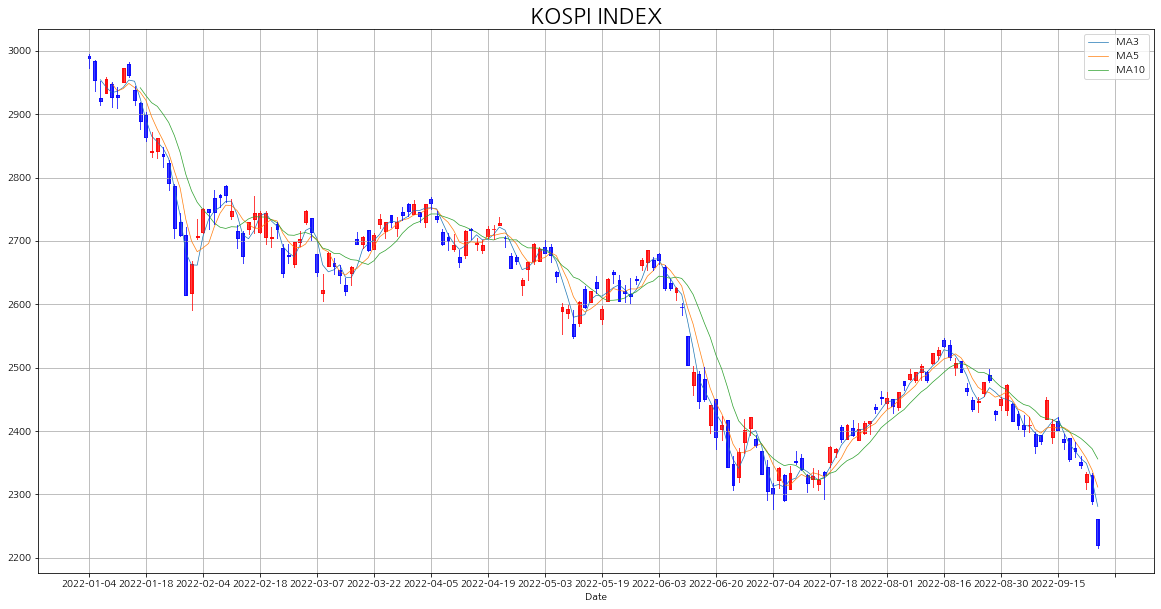

In [41]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
index = kospi_df.index.astype('str') # 캔들스틱 x축이 str로 들어감

# 이동평균선 그리기
ax.plot(index, kospi_df['MA3'], label='MA3', linewidth=0.7)
ax.plot(index, kospi_df['MA5'], label='MA5', linewidth=0.7)
ax.plot(index, kospi_df['MA10'], label='MA10', linewidth=0.7)

# X축 티커 숫자 20개로 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

# 그래프 title과 축 이름 지정
ax.set_title('KOSPI INDEX', fontsize=22)
ax.set_xlabel('Date')

# 캔들차트 그리기
candlestick2_ohlc(ax, kospi_df['Open'], kospi_df['High'], 
                  kospi_df['Low'], kospi_df['Close'],
                  width=0.5, colorup='r', colordown='b')
ax.legend()
plt.grid()
plt.show()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,4786.830078,4765.750000,4775.209961,4766.180176,2446190000,4766.180176
2022-01-03,4796.640137,4758.169922,4778.140137,4796.560059,2775190000,4796.560059
2022-01-04,4818.620117,4774.270020,4804.509766,4793.540039,3641050000,4793.540039
2022-01-05,4797.700195,4699.439941,4787.990234,4700.580078,3733540000,4700.580078
2022-01-06,4725.009766,4671.259766,4693.390137,4696.049805,3371250000,4696.049805


,High,Low,Open,Close,Volume,Adj Close,MA3,MA5,MA10,MA20
Date,,,,,,,,,,
2021-12-31,4786.830078,4765.750000,4775.209961,4766.180176,2446190000,4766.180176,NaN,NaN,NaN,NaN
2022-01-03,4796.640137,4758.169922,4778.140137,4796.560059,2775190000,4796.560059,NaN,NaN,NaN,NaN
2022-01-04,4818.620117,4774.270020,4804.509766,4793.540039,3641050000,4793.540039,4785.426758,NaN,NaN,NaN
2022-01-05,4797.700195,4699.439941,4787.990234,4700.580078,3733540000,4700.580078,4763.560059,NaN,NaN,NaN
2022-01-06,4725.009766,4671.259766,4693.390137,4696.049805,3371250000,4696.049805,4730.056641,4750.582031,NaN,NaN


InvalidIndexError: (slice(None, None, None), None)

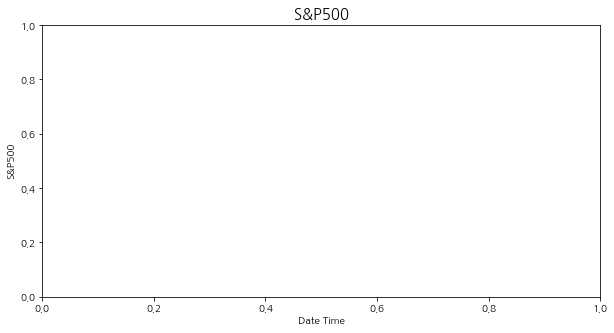

In [36]:
# 데이터를 가져올 날짜 설정
start_date = datetime(2022,1,1)
end_date = datetime(2022,9,27)

# 야후에서 코스피 데이터 가져오기
sp_df = data.get_data_yahoo("^GSPC", start_date, end_date) 
display(sp_df.head(5))

# 지수 이동평균선 데이터 구하기
sp_df['MA3'] = sp_df['Close'].rolling(3).mean()
sp_df['MA5'] = sp_df['Close'].rolling(5).mean()
sp_df['MA10'] = sp_df['Close'].rolling(10).mean()
sp_df['MA20'] = sp_df['Close'].rolling(20).mean()
display(sp_df.head(5))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('S&P500', fontsize=15)
ax.set_ylabel("S&P500")
ax.set_xlabel("Date Time")
ax.plot(sp_df.index, sp_df[['Close','MA5','MA10']])
ax.legend(['Close','MA5','MA10'])
plt.show()

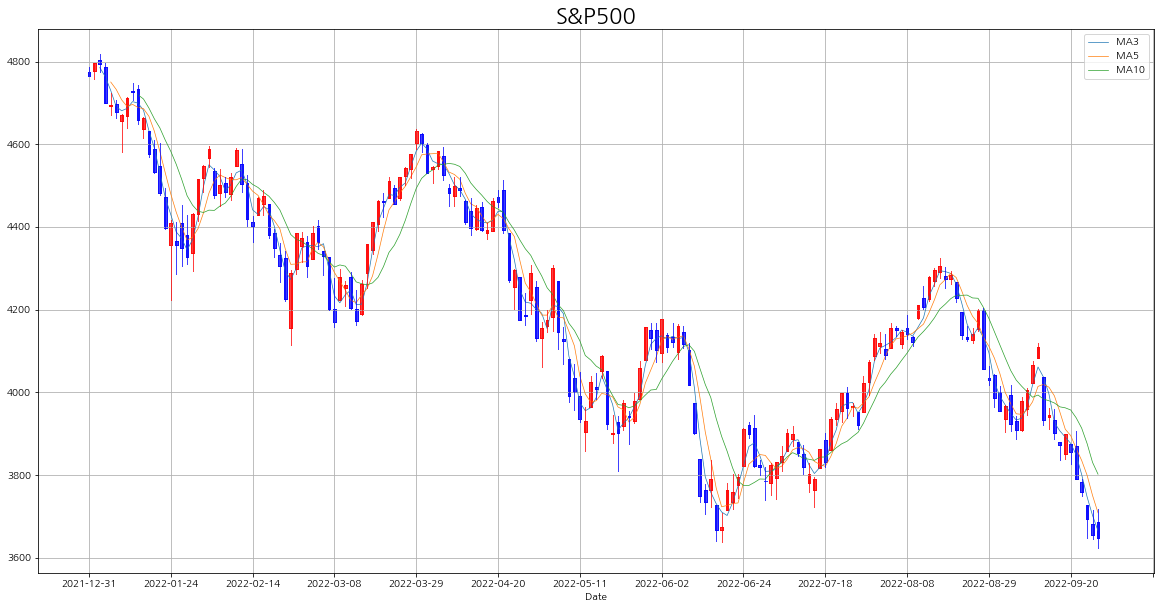

In [38]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
index = sp_df.index.astype('str') # 캔들스틱 x축이 str로 들어감

# 이동평균선 그리기
ax.plot(index, sp_df['MA3'], label='MA3', linewidth=0.7)
ax.plot(index, sp_df['MA5'], label='MA5', linewidth=0.7)
ax.plot(index, sp_df['MA10'], label='MA10', linewidth=0.7)

# X축 티커 숫자 20개로 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

# 그래프 title과 축 이름 지정
ax.set_title('S&P500', fontsize=22)
ax.set_xlabel('Date')

# 캔들차트 그리기
candlestick2_ohlc(ax, sp_df['Open'], sp_df['High'], 
                  sp_df['Low'], sp_df['Close'],
                  width=0.5, colorup='r', colordown='b')
ax.legend()
plt.grid()
plt.show()

,High,Low,Open,Close,Volume,Adj Close,MA3,MA5,MA10,MA20
Date,,,,,,,,,,
2022-01-04,2995.250000,2973.080078,2991.969971,2989.239990,621200.0,2989.239990,NaN,NaN,NaN,NaN
2022-01-05,2986.199951,2936.729980,2984.050049,2953.969971,786900.0,2953.969971,NaN,NaN,NaN,NaN
2022-01-06,2952.540039,2915.379883,2925.399902,2920.530029,785500.0,2920.530029,2954.579997,NaN,NaN,NaN
2022-01-07,2959.030029,2933.100098,2933.780029,2954.889893,545800.0,2954.889893,2943.129964,NaN,NaN,NaN
2022-01-10,2951.120117,2910.899902,2947.370117,2926.719971,477000.0,2926.719971,2934.046631,2949.069971,NaN,NaN


,High,Low,Open,Close,Volume,Adj Close,MA3,MA5,MA10,MA20
Date,,,,,,,,,,
2021-09-26,1181.709961,1173.250000,1179.199951,1179.199951,0,1179.199951,NaN,NaN,NaN,NaN
2021-09-27,1188.020020,1177.000000,1177.000000,1176.959961,0,1176.959961,NaN,NaN,NaN,NaN
2021-09-28,1188.170044,1180.560059,1186.890015,1186.890015,0,1186.890015,1181.016642,NaN,NaN,NaN
2021-09-29,1188.150024,1178.939941,1187.280029,1187.430054,0,1187.430054,1183.760010,NaN,NaN,NaN
2021-09-30,1188.680054,1179.260010,1183.550049,1183.719971,0,1183.719971,1186.013346,1182.83999,NaN,NaN


InvalidIndexError: (slice(None, None, None), None)

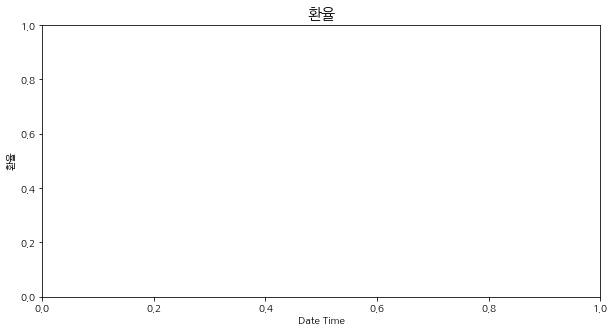

In [39]:
# 데이터를 가져올 날짜 설정
start_date = datetime(2021,9,27)
end_date = datetime(2022,9,27)

# 야후에서 코스피 데이터 가져오기
KRW_df = data.get_data_yahoo("KRW=X", start_date, end_date) 
display(kospi_df.head(5))

# 지수 이동평균선 데이터 구하기
KRW_df['MA3'] = KRW_df['Close'].rolling(3).mean()
KRW_df['MA5'] = KRW_df['Close'].rolling(5).mean()
KRW_df['MA10'] = KRW_df['Close'].rolling(10).mean()
KRW_df['MA20'] = KRW_df['Close'].rolling(20).mean()
display(KRW_df.head(5))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('환율', fontsize=15)
ax.set_ylabel("환율")
ax.set_xlabel("Date Time")
ax.plot(KRW_df.index, KRW_df[['Close','MA5','MA10']])
ax.legend(['Close','MA5','MA10'])
plt.show()

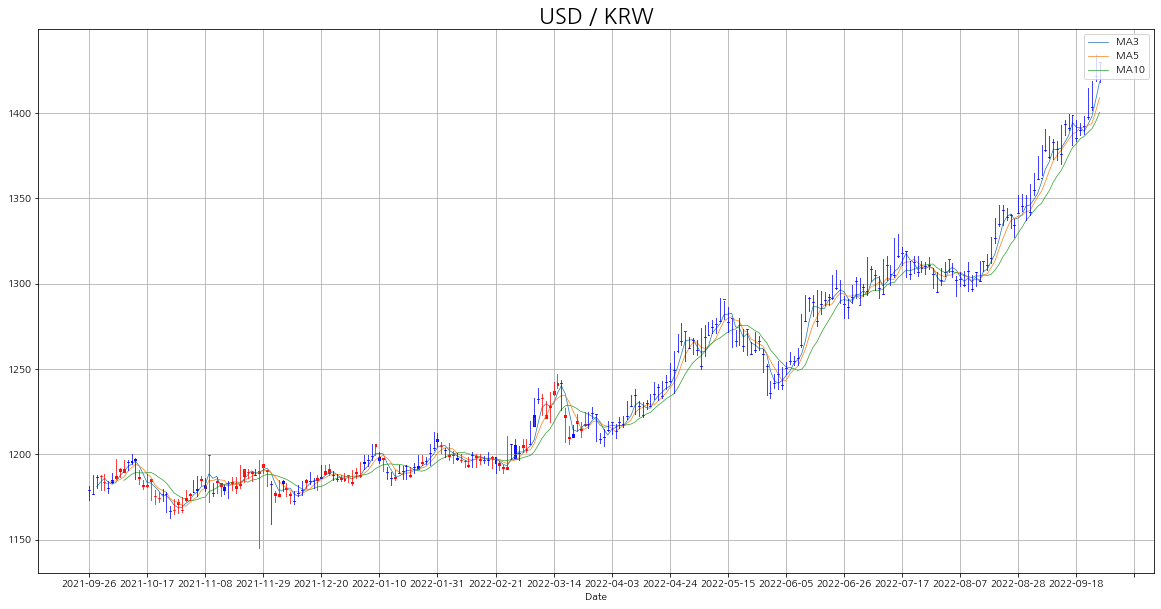

In [40]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
index = KRW_df.index.astype('str') # 캔들스틱 x축이 str로 들어감

# 이동평균선 그리기
ax.plot(index, KRW_df['MA3'], label='MA3', linewidth=0.7)
ax.plot(index, KRW_df['MA5'], label='MA5', linewidth=0.7)
ax.plot(index, KRW_df['MA10'], label='MA10', linewidth=0.7)

# X축 티커 숫자 20개로 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

# 그래프 title과 축 이름 지정
ax.set_title('USD / KRW', fontsize=22)
ax.set_xlabel('Date')

# 캔들차트 그리기
candlestick2_ohlc(ax, KRW_df['Open'], KRW_df['High'], 
                  KRW_df['Low'], KRW_df['Close'],
                  width=0.5, colorup='r', colordown='b')
ax.legend()
plt.grid()
plt.show()